In [1]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
#from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader
#from vis_utils import *
import random;
import math;
import matplotlib.pyplot as  plt


In [29]:
num_epochs = 5;
batch_size = 100;
learning_rate = 0.001;

In [30]:
class FashionMNISTDataset(Dataset):
    '''Fashion MNIST Dataset'''
    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file
            transform (callable): Optional transform to apply to sample
        """
        
        data = pd.read_csv(csv_file);
        self.X = np.array(data.iloc[:, 1:]).reshape(-1, 1, 28, 28)#.astype(float);
        self.Y = np.array(data.iloc[:, 0]);
        
        del data;
        self.transform = transform;
        
    def __len__(self):
        return len(self.X);
    
    def __getitem__(self, idx):
        item = self.X[idx];
        label = self.Y[idx];
        
        if self.transform:
            item = self.transform(item);
        
        return (item, label);

In [31]:
train_dataset = FashionMNISTDataset(csv_file='/work/data/fashion-mnist_train.csv');
test_dataset = FashionMNISTDataset(csv_file='/work/data/fashion-mnist_test.csv')

In [32]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True);
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True);

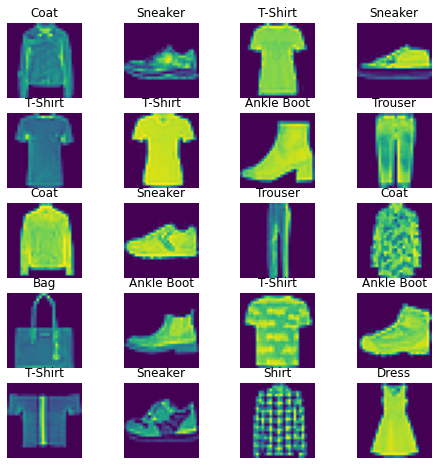

In [33]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, )
plt.show()

In [34]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [35]:
#instance of the Conv Net
cnn = CNN();
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate);

In [36]:
losses = [];
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.float())
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data);
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data))

Epoch : 1/5, Iter : 100/600,  Loss: 0.4936
Epoch : 1/5, Iter : 200/600,  Loss: 0.4160
Epoch : 1/5, Iter : 300/600,  Loss: 0.4220
Epoch : 1/5, Iter : 400/600,  Loss: 0.3381
Epoch : 1/5, Iter : 500/600,  Loss: 0.3657
Epoch : 1/5, Iter : 600/600,  Loss: 0.3041
Epoch : 2/5, Iter : 100/600,  Loss: 0.3027
Epoch : 2/5, Iter : 200/600,  Loss: 0.2507
Epoch : 2/5, Iter : 300/600,  Loss: 0.2744
Epoch : 2/5, Iter : 400/600,  Loss: 0.2745
Epoch : 2/5, Iter : 500/600,  Loss: 0.4474
Epoch : 2/5, Iter : 600/600,  Loss: 0.4081
Epoch : 3/5, Iter : 100/600,  Loss: 0.2194
Epoch : 3/5, Iter : 200/600,  Loss: 0.1568
Epoch : 3/5, Iter : 300/600,  Loss: 0.4595
Epoch : 3/5, Iter : 400/600,  Loss: 0.1756
Epoch : 3/5, Iter : 500/600,  Loss: 0.1609
Epoch : 3/5, Iter : 600/600,  Loss: 0.2957
Epoch : 4/5, Iter : 100/600,  Loss: 0.2233
Epoch : 4/5, Iter : 200/600,  Loss: 0.1895
Epoch : 4/5, Iter : 300/600,  Loss: 0.1924
Epoch : 4/5, Iter : 400/600,  Loss: 0.1511
Epoch : 4/5, Iter : 500/600,  Loss: 0.1691
Epoch : 4/5

In [37]:
cnn.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.float())
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 91.4100 %


In [38]:
import pickle

with open('parrot.pkl', 'rb') as f:
    my_new_list = pickle.load(f)

print(len(my_new_list))
print(my_new_list[18][1])

24
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [39]:
cnn(torch.Tensor(my_new_list[22][0]).view(-1, 1, 28, 28))

tensor([[ -2.2632,  -2.6653,  -5.4286,  -4.8394,  -8.1063, -10.0257,  -3.4756,
         -10.3867,   1.4457,  -3.9401]], grad_fn=<AddmmBackward>)

In [40]:
print(my_new_list[19][1])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


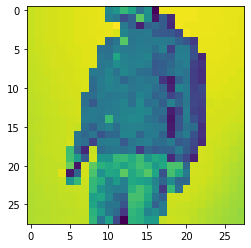

In [41]:
plt.imshow(my_new_list[12][0])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=92a9b59b-63e7-41f9-8b3e-67f96b76c3e4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>